# Time Series Anomaly Detection

This project will use the following dataset:

https://www.kaggle.com/boltzmannbrain/nab/code?datasetId=110&sortBy=voteCount

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization
import matplotlib.dates as md

dataset = pd.read_csv('../models/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_jumpsdown.csv', encoding='unicode_escape')
# print first 10 rows of dataset to better understand general data
dataset.head(10)

,timestamp,value
0,2014-04-01 00:00:00,18.090486
1,2014-04-01 00:05:00,20.359843
2,2014-04-01 00:10:00,21.105470
3,2014-04-01 00:15:00,21.151585
4,2014-04-01 00:20:00,18.137141
5,2014-04-01 00:25:00,21.625661
6,2014-04-01 00:30:00,21.673807
7,2014-04-01 00:35:00,20.245561
8,2014-04-01 00:40:00,19.928333
9,2014-04-01 00:45:00,18.179470


In [14]:
# shows number of rows and columns
dataset.shape

(4032, 2)

In [15]:
# gives general useful info about dataset such as null count and type of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


<AxesSubplot:xlabel='timestamp'>

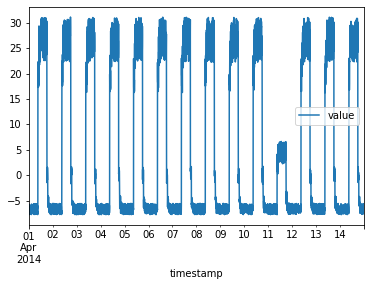

In [16]:
# change the type of timestamp column for plotting
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
# change fahrenheit to °C (temperature mean= 71 -> fahrenheit)
dataset['value'] = (dataset['value'] - 32) * 5/9
# plot the data
dataset.plot(x='timestamp', y='value')